# Time Complexity Comparison
### Author: Tomoya Tokunaga (matlto: ttokunag@ucsd.edu)
In this notebook, I compare time complexity of well-know sorting algorithms using `time` python standard library. Algorithms which are going to be compared here are the followings:
- Insertion sort
- Merge Sort
- Quick Sort
- Heap Sort

## How we compare time complexity
For those who are not familiar with python, I'll introduce a basic of timing in python.
1. `start = time.time()`
2. `execute a sorting method we want to time`
3. `print(time.time() - start)`
<br><br>The first line store numerical time data into a variable named `start`. `.time()` method in `time` class returns the time at the time method called.<br>
The second line calls a sorting algorithm. Then finally, it prints out the time difference of the time the algorithm was called and the time right after the method is done.

## Algorithm Implementation

### Insertion sort
Time | $O(N^2)$: <br>
N computations for the outer loop to traverse all elements to see if they are sorted. Another maximum N computations for the loop to look backward to find the appropriate place an unsorted element to be inserted<br><br>
Space | $O(1)$<br>
This algorithm uses constant space for variables beacause this is **in-place** algorithm

In [1]:
# @param arr: an array-like object to be sorted
def insertion_sort(arr):
    # traverses all elements to see if there are unsorted elements
    for i in range(1, len(arr)):
        target = arr[i]
        insert_idx = i - 1
        while insert_idx >= 0 and target < arr[insert_idx]:
            # moves an element to right by 1 for the element
            # to be inserted
            arr[insert_idx + 1] = arr[insert_idx]
            insert_idx -= 1
        arr[insert_idx + 1] = target

In [2]:
test = [123,641,46,134,624,57,568,5,68,65,97,3,562,562,45,6]
print("Original: {}".format(test))
insertion_sort(test)
print("Sorted  : {}".format(test))

Original: [123, 641, 46, 134, 624, 57, 568, 5, 68, 65, 97, 3, 562, 562, 45, 6]
Sorted  : [3, 5, 6, 45, 46, 57, 65, 68, 97, 123, 134, 562, 562, 568, 624, 641]


### Merge sort
Time | $O(Nlog(N))$: <br>
At most N computations for comparing two elements in a left half array and a right half array. log(N) computations for the dividing process of the given array<br><br>
Space | $O(N)$<br>
This algorithm needs to a sorted array for the next recursive calls. Therefore, it takes up O(N) memory

In [3]:
def merge_sort(arr):
    # an array length of <= 1 is already sorted
    if len(arr) <= 1:
        return arr
    # set a pivot to divide the given array into two
    pivot = len(arr)//2
    left_arr = merge_sort(arr[:pivot])
    right_arr = merge_sort(arr[pivot:])
    
    '''
    * the following is a helper method to recursively sort subarrayslef
    * @param left_array: the left divided array
    * @param right_array: the right divided array
    '''
    def merge(left_arr, right_arr):
        left_cur = right_cur = 0
        res = []
        # place a smaller element of two arrays to a smaller index
        while left_cur < len(left_arr) and right_cur < len(right_arr):
            if left_arr[left_cur] < right_arr[right_cur]:
                res.append(left_arr[left_cur])
                left_cur += 1
            else:
                res.append(right_arr[right_cur])
                right_cur += 1
        # once one array gets empty, append the other
        res.extend(left_arr[left_cur:])
        res.extend(right_arr[right_cur:])
        return res
    
    return merge(left_arr, right_arr)

In [4]:
test = [123,641,46,134,624,57,568,5,68,65,97,3,562,562,45,6]
print("Original: {}".format(test))
res = merge_sort(test)
print("Sorted  : {}".format(res))

Original: [123, 641, 46, 134, 624, 57, 568, 5, 68, 65, 97, 3, 562, 562, 45, 6]
Sorted  : [3, 5, 6, 45, 46, 57, 65, 68, 97, 123, 134, 562, 562, 568, 624, 641]


### Quick sort
Time | $O(Nlog(N))$: <br>
At most N computations for comparing elements with the pivot element. log(N) computations for the dividing process of the given array<br><br>
Space | $O(log(N))$<br>
This algorithm takes log(N) call stack memory everytime we call sort method for half arrays

In [5]:
def quick_sort(arr):
    '''
    * a helper method to "parition"(sort) an array into two,
    * that is, lower than a pivot & larger than a pivot.
    * @param arr: an array to be partitioned
    * @param low_idx: a lower bound of the partition range
    * @param high_idx: a higher bound of the partition range
    '''
    def partition(arr, low_idx, high_idx):
        # sets a pivot the higher index this time
        pivot = high_idx
        i = low_idx
        for j in range(low_idx, high_idx):
            if arr[j] < arr[pivot]:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1
        arr[i], arr[high_idx] = arr[high_idx], arr[i]
        # returns a center index of the partitioned array
        return i
    '''
    * another helper method which actually call the above partition
    * method recursively
    '''
    def sort(arr, low_idx, high_idx):
        if low_idx < high_idx:
            p = partition(arr, low_idx, high_idx)
            sort(arr, low_idx, p-1)
            sort(arr, p+1, high_idx)
    
    sort(arr, 0, len(arr)-1)

In [6]:
test = [123,641,46,134,624,57,568,5,68,65,97,3,562,562,45,6]
print("Original: {}".format(test))
quick_sort(test)
print("Sorted  : {}".format(test))

Original: [123, 641, 46, 134, 624, 57, 568, 5, 68, 65, 97, 3, 562, 562, 45, 6]
Sorted  : [3, 5, 6, 45, 46, 57, 65, 68, 97, 123, 134, 562, 562, 568, 624, 641]


### Heap sort
------ we use **the Max Heap** structure here ------<br><br>
Time | $O(Nlog(N))$: <br>
N computations for visiting all elements in the given array. log(N) computations for heapify each element in the given array.<br><br>
Space | $O(1)$<br>
This algorithm takes a constant memory only for variables. Heap sort is an **in-place** algorithm

In [7]:
def heap_sort(arr):
    '''
    * a helper method which places an element at the given index to the 
    * appropriate place in the max heap structure
    * @param arr: an array which the element is in
    * @param idx: the index of the element in the array
    * @param size: the size of the array
    '''
    def percolate_down(arr, idx, size):
        child_idx = 2*idx + 1
        value = arr[idx]
        while child_idx < size:
            max_value = value
            max_idx = -1
            for i in range(2):
                if child_idx + i < size and arr[child_idx + i] > max_value:
                    max_value = arr[child_idx + i]
                    max_idx = child_idx + i
            if max_value == value:
                return
            else:
                arr[idx], arr[max_idx] = arr[max_idx], arr[idx]
                idx = max_idx
                child_idx = 2*idx + 1
    
    # heapify the given array
    for i in range(int((len(arr)/2) - 1), -1, -1):
        percolate_down(arr, i, len(arr))
    # place the max element at the end & heapify the array in the range
    for i in range(len(arr)-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        percolate_down(arr, 0, i)

In [8]:
test = [123,641,46,134,624,57,568,5,68,65,97,3,562,562,45,6]
print("Original: {}".format(test))
heap_sort(test)
print("Sorted  : {}".format(test))

Original: [123, 641, 46, 134, 624, 57, 568, 5, 68, 65, 97, 3, 562, 562, 45, 6]
Sorted  : [3, 5, 6, 45, 46, 57, 65, 68, 97, 123, 134, 562, 562, 568, 624, 641]


## Time the performance of each algorithm
### How we test performance
First of all, Our goal here is to time each algorithm and to plot the result on a graph to visually convince which algorithm is better in general. This experiment following input rules for inputs for each algorithms:
- input array is size of 10, 50, 100, 250, 500, 750, 1000, 2500, 5000, and 100000. 
- the numbers contained in the array range from [-500, 500]
- the numbers are randomized by random integer generator of `random` module. <br><br>
After we gather data by conducting timing experiment, we plot the resultant data on a graph to visually compare each performance. It's a fun time to do so!!

In [9]:
# import time library to time the performance
import time
# import random module to time performance
import random

# a dictionary to call each algorithm
algos = {
        "insertion": insertion_sort,
        "merge": merge_sort,
        "quick": quick_sort,
        "heap": heap_sort
        }

# a method to print how long a method takes to sort the given array
def timing(arr, algo_name, history):
    start = time.time()
    algos[algo_name](arr)
    # stores the time in a dataset
    history.append(time.time() - start)
    
# a function to generate a list of randomized data lists
def smpl_generator():
    return [[random.randint(-500, 500) for _ in range(10)],
             [random.randint(-500, 500) for _ in range(50)],
             [random.randint(-500, 500) for _ in range(75)],
             [random.randint(-500, 500) for _ in range(100)],
             [random.randint(-500, 500) for _ in range(200)],
             [random.randint(-500, 500) for _ in range(300)],
             [random.randint(-500, 500) for _ in range(400)],
             [random.randint(-500, 500) for _ in range(500)],
             [random.randint(-500, 500) for _ in range(600)],
             [random.randint(-500, 500) for _ in range(700)],
             [random.randint(-500, 500) for _ in range(800)],
             [random.randint(-500, 500) for _ in range(900)],
             [random.randint(-500, 500) for _ in range(1000)]]

### Start the experiment !!!!

In [15]:
insertion_data = []
for smpl in smpl_generator():
    timing(smpl, "insertion", insertion_data)
    
heap_data = []
for smpl in smpl_generator():
    timing(smpl, "heap", heap_data)
    
merge_data = []
for smpl in smpl_generator():
    timing(smpl, "merge", merge_data)
    
quick_data = []
for smpl in smpl_generator():
    timing(smpl, "quick", quick_data)

### Turning the result to a dataframe

In [16]:
# pandas is great at creating a dataframe
import pandas as pd

result = pd.DataFrame(data={"Inserttion": insertion_data, 
                            "Heap": heap_data, 
                            "Merge": merge_data, 
                            "Quick": quick_data}, 
                      index=[10,50,75,100,200,300,400,500,600,700,800,900,1000])
result

,Inserttion,Heap,Merge,Quick
10,0.000012,0.000084,0.000024,0.000014
50,0.000138,0.000154,0.000114,0.000048
75,0.000238,0.000252,0.000184,0.000093
100,0.000508,0.000435,0.000250,0.000108
200,0.001580,0.000921,0.000557,0.000232
300,0.004707,0.001412,0.000893,0.000432
400,0.006432,0.001982,0.001231,0.000542
500,0.010253,0.002674,0.001612,0.000781
600,0.014539,0.003340,0.001922,0.001165
700,0.018061,0.004064,0.002292,0.001132


# Graph the Result & Conclusion
Now it's time to fun! From this section we draw a line chart graph of the resultant data from the previous experiment. We're going to use a module `matplotlib` and `pandas` to draw and save images.

<Figure size 7200x576 with 0 Axes>

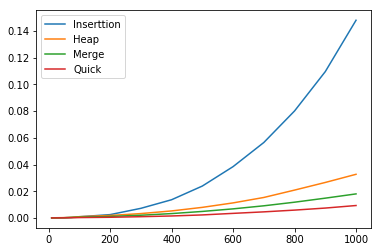

In [17]:
# import a module for graphing
import matplotlib.pyplot as plt

# the followings generate a graph and save it as an image file
df = result.cumsum()
fig = plt.figure(figsize=(100,8))
df.plot()
plt.savefig('result1.png', dpi=130)

The graph shows the obvious performance difference of the Insertion sort and the other algorithms. As we've seen in the implementation part, the Insertion sort is the worst time complexity of $O(N^2)$ while the others are only $O(Nlog(N))$. So, it's safe to say that the Insertion sort should avoid to be used from the result.<br><br>
**However**, one thing we should mention is the Insertion sort performance of smaller size dataset. The data table above shows that the Insertion sort is faster than the Merge and Heap sort until the size of dataset gets 50~75. Algorithmically speaking, the Insertion sort is better choice if a dataset is almost sorted and relatively small(around ~75). The result of this experiment shows the good aspect of the Insertion sort.

Now let's draw another graph to see the other 3 algorithms performance. We omit the data of the Insertion sort from the dataset, and draw a graph based on that.

In [18]:
result = pd.DataFrame(data={"Heap": heap_data, 
                            "Merge": merge_data, 
                            "Quick": quick_data}, 
                      index=[10,50,75,100,200,300,400,500,600,700,800,900,1000])
result

,Heap,Merge,Quick
10,0.000084,0.000024,0.000014
50,0.000154,0.000114,0.000048
75,0.000252,0.000184,0.000093
100,0.000435,0.000250,0.000108
200,0.000921,0.000557,0.000232
300,0.001412,0.000893,0.000432
400,0.001982,0.001231,0.000542
500,0.002674,0.001612,0.000781
600,0.003340,0.001922,0.001165
700,0.004064,0.002292,0.001132


<Figure size 7200x576 with 0 Axes>

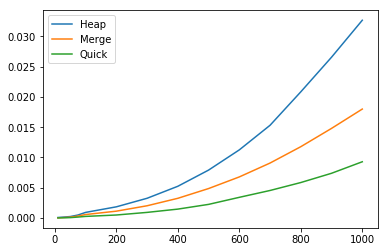

In [19]:
df = result.cumsum()
fig = plt.figure(figsize=(100,8))
df.plot()
plt.savefig('result2.png', dpi=130)

This is a very clean result. It says that the Heap sort is the slowest among the three, then the Merge sort and the Quick sort. So, we can conclude that the **Quick sort** is the fastest sorting algorithm (the name actually comes from this result).<br><br>
However, we cannot say something like *"Okay, so because the Quick sort is the quickest way to sort an array, let's use it every time we need to sort"*. This is because things which determine what algorithms is better to use is not only how fast it is. It's determined also by how memory efficient it is or what situation it should be used.<br><br>
For example, as I mentioned the Insertion sort is better than others at the situation where elements are almost sorted. Also, the Heap sort may be chosen over the Quick sort because the Heap sort is a constant memory algorithm ($O(1)$) while the Quick sort is $O(log(N))$.
<br><br>
In conclusion, in most of the case actually, we may choose the Quick sort because of its speed. Nevertheless, we should not blindly use it solely because it's known as fastest. We definitely choose our algorithm with comprehensive understanding of situations.